# Implementation of ARIMA for 

## Reading all the required libraries for plots/eda/model build/testing

In [12]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

## Importing the data 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


## Exploratory data analysis 

#### The purpose of this step is to get familiar with the data and get the p,d,q values required to model the time series.We start by checking the stationarity of the time series - 2 ways to do this, either visually or via Augmented Dicky Fueller test


### Visual inspection of stationarity

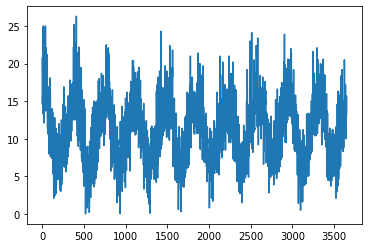

In [24]:
plt.plot(df.Temp)
#the data shows a somewhat constant mean and variance

### Augmented Dicky Fuller Test

In [25]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(df.Temp.dropna())
print('P value: %f' % test[1] )
#the data does not need to be differenced since we can reject the null hypothesis around stationarity

P value: 0.000247


### Autocorrelation Plot

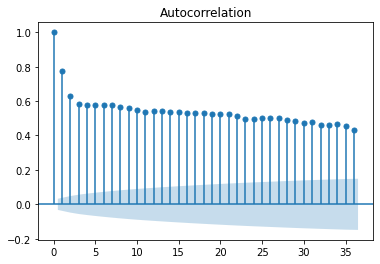

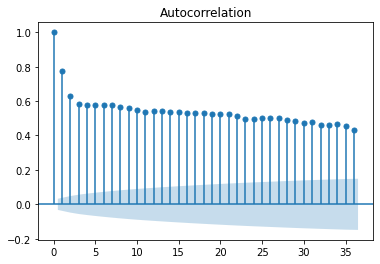

In [54]:
plot_acf(df.Temp.dropna()) ## autocorrelation without differencing

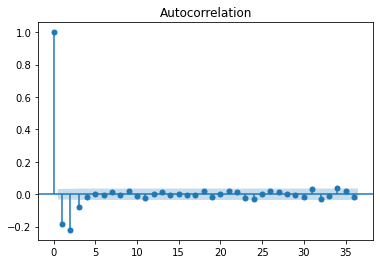

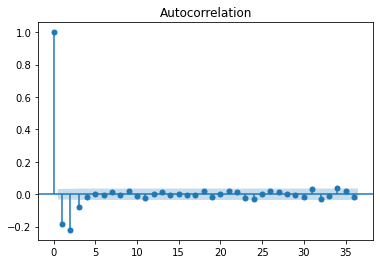

In [45]:
plot_acf(df.Temp.diff().dropna()) 
## with 1st order differencing, the lag becomes negative very fast. No need for differencing.

### Finding the AR term of the model

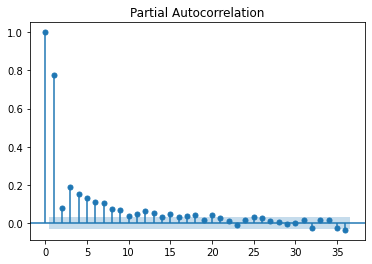

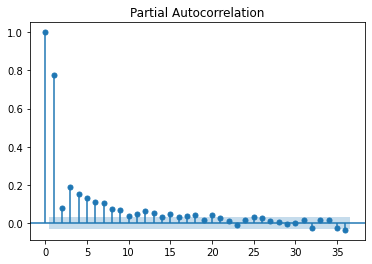

In [51]:
# plotting a pacf plot to find the partial autocorrelation between variable and hence the right p to be selected
plot_pacf(df.Temp.dropna())
#from the plot it looks like taking 2 lagged terms(since they're the ones way above significance level) should suffice

### Finding the MA term of the model

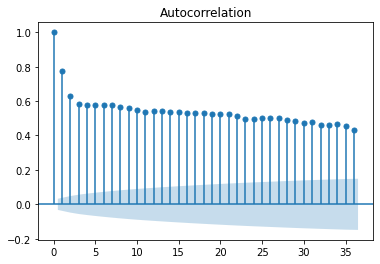

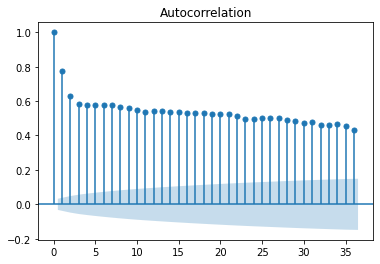

In [55]:
# plotting a acf plot to find the autocorrelation between variable and hence the right q to be selected
plot_acf(df.Temp.dropna())
#Quite a few lags are above the significane line, lets take 2 to begin with

## Building the model

### Splitting the model into train test split